In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib.image import pil_to_array
from PIL import Image

Pixel area: 0.01 square degrees
(5400, 10800)


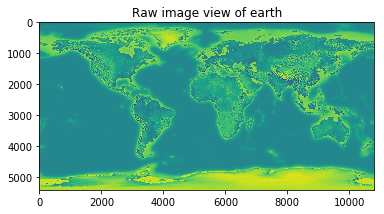

In [2]:
%matplotlib inline

NSIDE = 512
print "Pixel area: %.2f square degrees" % hp.nside2pixarea(NSIDE, degrees=True)
grayscale_pil_image = Image.open("./shadedrelief.jpg").convert("L")
image_array = pil_to_array(grayscale_pil_image)
print image_array.shape

plt.imshow(image_array)
plt.title("Raw image view of earth")

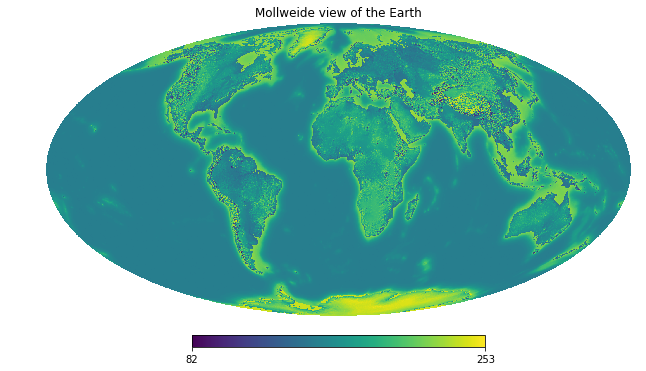

In [3]:
theta = np.linspace(0, np.pi, num=image_array.shape[0])[:, None]
phi = np.linspace(-np.pi, np.pi, num=image_array.shape[1])
pix = hp.ang2pix(NSIDE, theta, phi)

healpix_map = np.zeros(hp.nside2npix(NSIDE), dtype=np.double)
healpix_map[pix] = image_array

hp.mollview(healpix_map, xsize=2000, flip="geo")
plt.title("Mollweide view of the Earth")

Sigma is 50.959308 arcmin (0.014823 rad) 
-> fwhm is 120.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


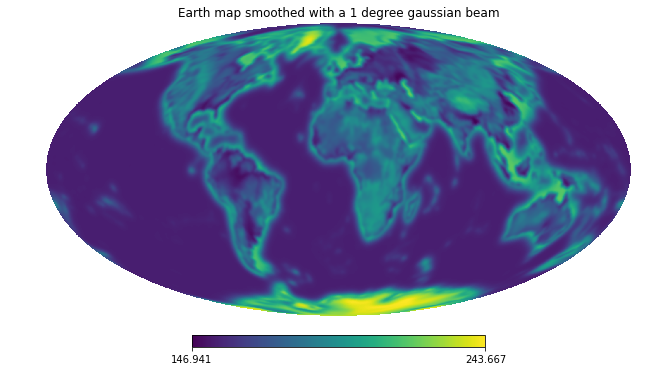

In [4]:
hp.mollview(hp.smoothing(healpix_map, fwhm=np.radians(2)), xsize=2000, flip="geo")
plt.title("Earth map smoothed with a 1 degree gaussian beam")

Edinburgh lon: -3.19, lat: 55.95


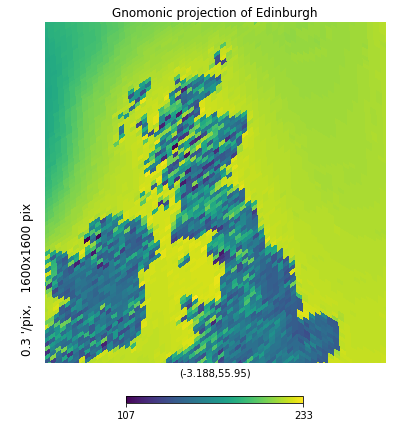

In [5]:
import ephem
edi = ephem.city("Edinburgh")
lon, lat = np.rad2deg(edi.lon), np.rad2deg(edi.lat)
print "Edinburgh lon: %.2f, lat: %.2f" % (lon, lat)

hp.gnomview(healpix_map, rot=(lon, lat), reso=.3, xsize=1600, flip="geo")
plt.title("Gnomonic projection of Edinburgh")

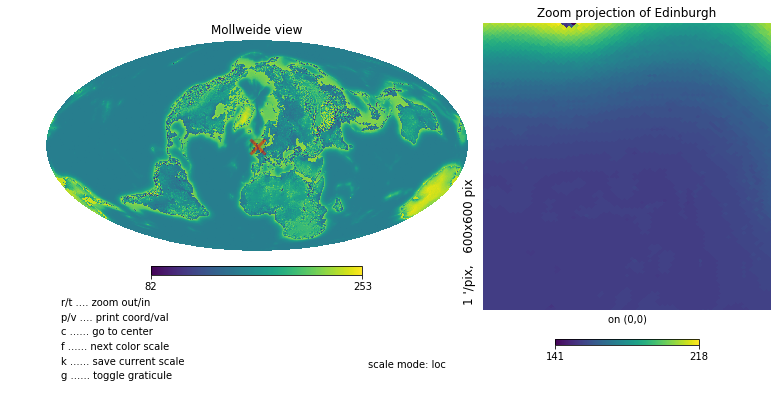

In [6]:
hp.mollzoom(healpix_map, rot=(lon, lat), xsize=1600, flip="geo")
plt.title("Zoom projection of Edinburgh")

In [29]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import ephem

from matplotlib.image import pil_to_array
from PIL import Image
from datetime import datetime

def hard_sigmoid(x, s=10):
    return 1. / (1 + np.exp(-s * x))

NSIDE = 32
zen = ephem.Observer()
sun = ephem.Sun()
edi = ephem.city("Edinburgh")

i = np.arange(hp.nside2npix(NSIDE))
theta, phi = hp.pix2ang(NSIDE, i)
phi[phi > np.pi] -= 2 * np.pi

m = hard_sigmoid(np.pi/2 - theta)

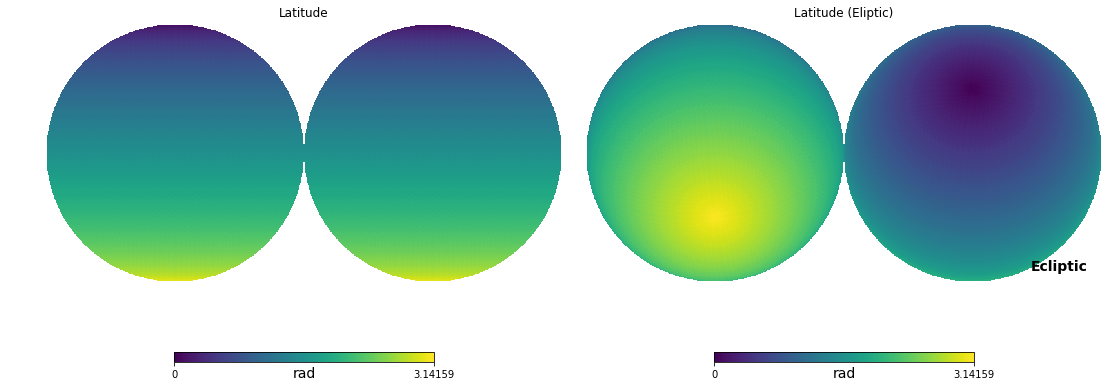

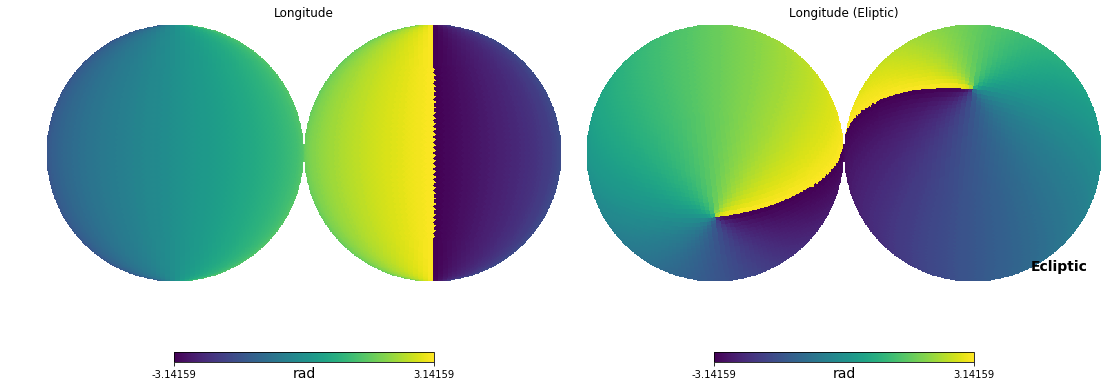

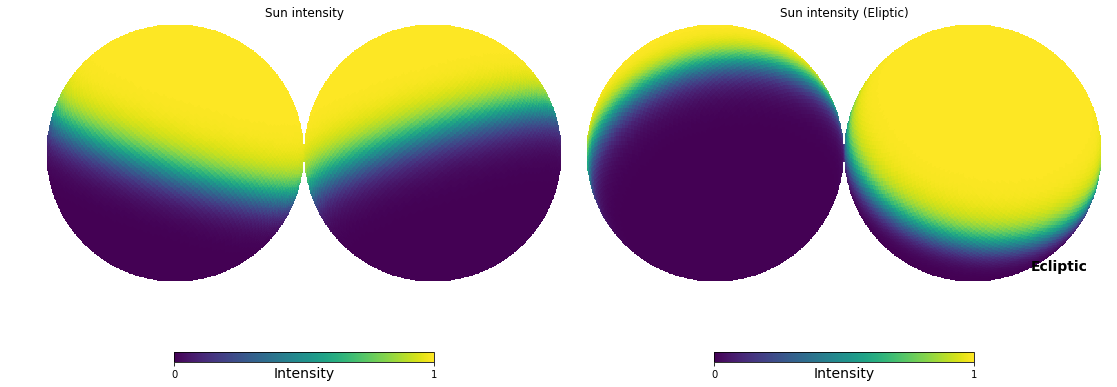

In [77]:
%matplotlib inline

plt.figure(1, figsize=(15, 20))
hp.orthview(theta, min=0, max=np.pi,title="Latitude", flip="geo",
               unit=r'rad', sub=(1,2,1), fig=1)
hp.orthview(theta, min=0, max=np.pi,title="Latitude (Eliptic)", flip="geo", coord='ge',
               unit=r'rad', sub=(1,2,2), fig=1)

plt.figure(2, figsize=(15, 20))
hp.orthview(phi, min=-np.pi, max=np.pi, title="Longitude", flip="geo", 
           unit=r'rad', sub=(1,2,1), fig=2)
hp.orthview(phi, min=-np.pi, max=np.pi, title="Longitude (Eliptic)", flip="geo", coord='ge',
           unit=r'rad', sub=(1,2,2), fig=2)

plt.figure(3, figsize=(15, 20))
hp.orthview(m, min=0, max=1,title="Sun intensity", flip="geo",
               unit=r'Intensity', sub=(1,2,1), fig=3)
hp.orthview(m, min=0, max=1,title="Sun intensity (Eliptic)", flip="geo", coord='ge',
               unit=r'Intensity', sub=(1,2,2), fig=3)


In [31]:
def sun2lonlat(s, show=False):
    azi, alt = np.rad2deg(s.az), np.rad2deg(s.alt)
    if azi > 180.:
        azi -= 360.
    
    if show:
        print 'Sun:\tLon = %.2f\t Lat = %.2f' % (lon, lat)
        
    return azi, alt

Sun:	Lon = -17.30	 Lat = -9.05
Sun:	Lon = -3.37	 Lat = -10.56
Sun:	Lon = 10.60	 Lat = -10.03
Sun:	Lon = 24.28	 Lat = -7.49
Sun:	Lon = 37.41	 Lat = -1.95
Sun:	Lon = 49.89	 Lat = 2.82
Sun:	Lon = 61.84	 Lat = 9.61
Sun:	Lon = 73.53	 Lat = 17.33
Sun:	Lon = 85.37	 Lat = 25.55
Sun:	Lon = 97.96	 Lat = 33.92
Sun:	Lon = 112.11	 Lat = 42.01
Sun:	Lon = 128.91	 Lat = 49.23
Sun:	Lon = 149.49	 Lat = 54.73
Sun:	Lon = 173.79	 Lat = 57.38
Sun:	Lon = -160.93	 Lat = 56.44
Sun:	Lon = -138.39	 Lat = 52.18
Sun:	Lon = -119.86	 Lat = 45.67
Sun:	Lon = -104.58	 Lat = 37.91
Sun:	Lon = -91.35	 Lat = 29.62
Sun:	Lon = -79.23	 Lat = 21.28
Sun:	Lon = -67.53	 Lat = 13.27
Sun:	Lon = -55.75	 Lat = 5.96
Sun:	Lon = -43.55	 Lat = -0.01
Sun:	Lon = -30.74	 Lat = -5.37


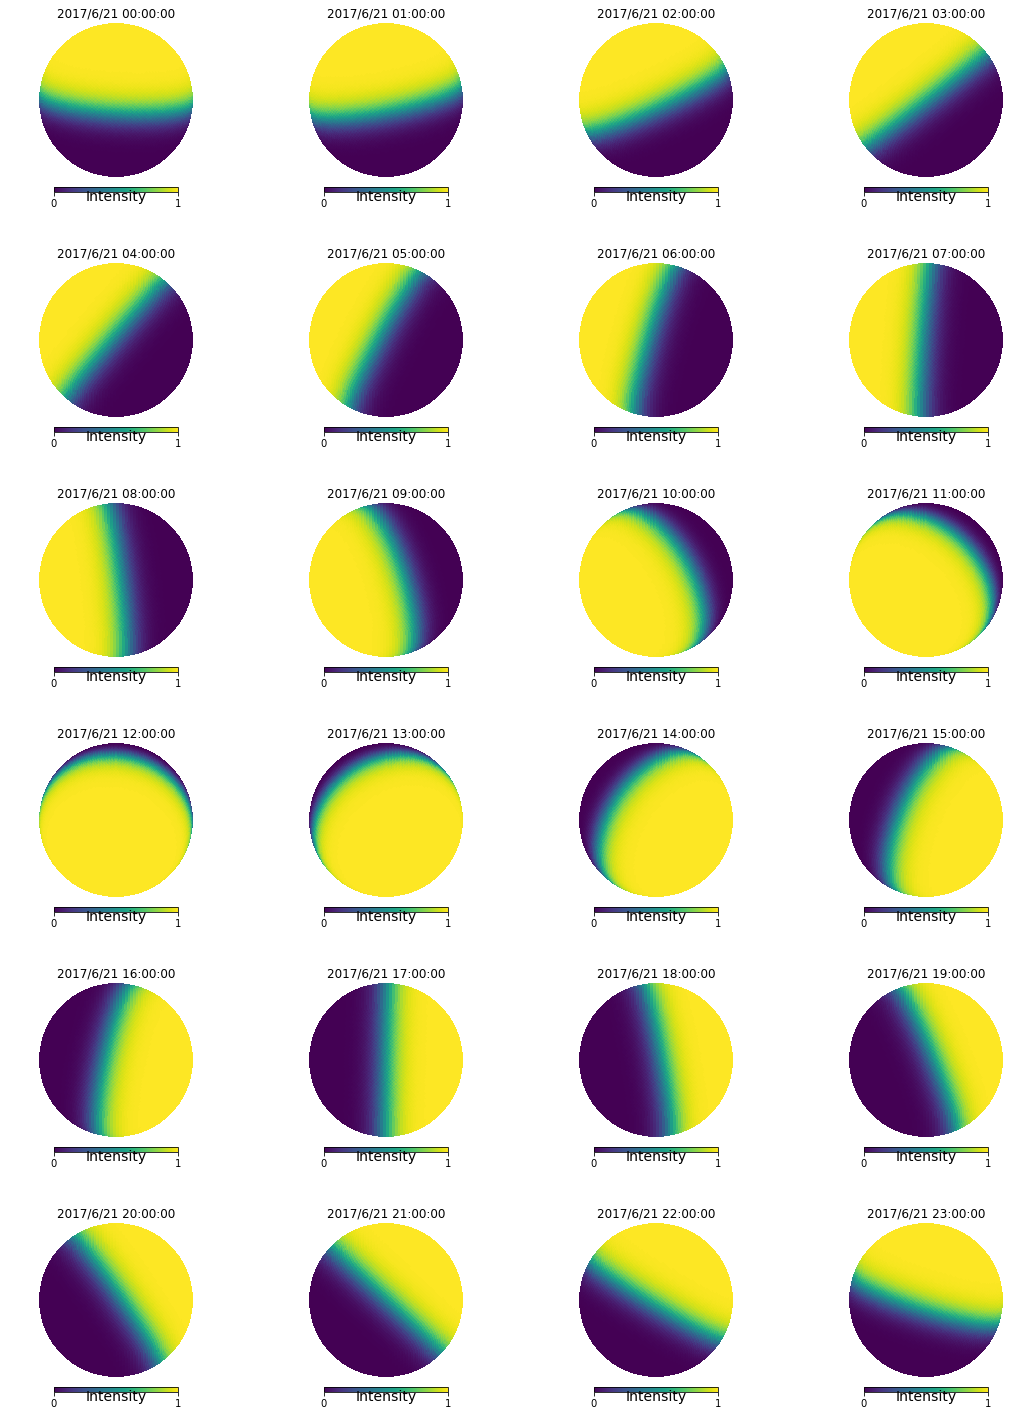

In [75]:
plt.figure(2, figsize=(15, 20))
for h in xrange(24):
    edi.date = datetime(2017, 6, 21, h, 0, 0)
    sun.compute(edi)
    
    lon, lat = sun2lonlat(sun, show=True)
    x, y, z = lon, lat, 0.

    rot_theta, rot_phi = hp.Rotator(rot=(z, y, x))(theta, phi)
#     rot_i = hp.ang2pix(NSIDE, rot_theta, rot_phi)
    
    m = hard_sigmoid(np.pi/2 - rot_theta)
    hp.orthview(m, min=0, max=1, flip="geo", # coord="ge",
                half_sky=True, title=str(edi.date),
                unit=r'Intensity', sub=(6,4,h+1), fig=1)
#     hp.mollview(m, min=0, max=1, title=str(edi.date), flip="geo",
#                unit=r'Intensity', sub=(6,4,h+1), fig=1)

Sun:	Lon = -17.30	 Lat = -9.05


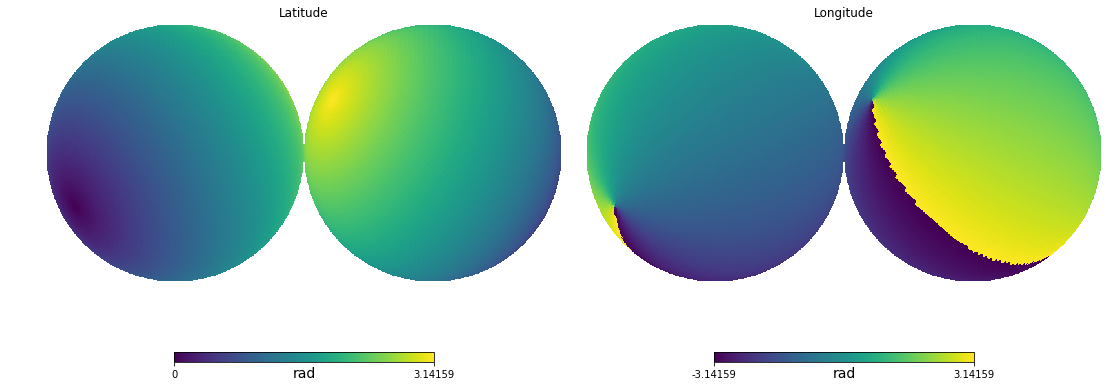

In [78]:
edi.date = datetime(2017, 6, 21, 10, 0, 0)
sun.compute(edi)

lon, lat = sun2lonlat(sun, show=True)
x, y, z = lon, lat, 0.

rot_theta, rot_phi = hp.Rotator(rot=(z, y, x))(theta, phi)
m = hard_sigmoid(np.pi/2 - rot_theta)

plt.figure(1, figsize=(15, 20))

hp.orthview(rot_theta, min=0, max=np.pi, title="Latitude", flip="geo", # coord="ge",
               unit=r'rad', sub=(1,2,1), fig=1)
hp.orthview(rot_phi, min=-np.pi, max=np.pi, title="Longitude", flip="geo", # coord="ge",
           unit=r'rad', sub=(1,2,2), fig=1)

In [79]:
print "Theta", rot_theta.min(), rot_theta.max(), "Phi", rot_phi.min(), rot_phi.max()
print "Lat", np.deg2rad(lat), "Lon", np.deg2rad(lon) 

dist = hp.rotator.angdist([np.deg2rad(lat), np.deg2rad(lon)], [rot_theta, rot_phi])
print "Dist", np.rad2deg(dist.min()), np.rad2deg(dist.max())

deg = .75 * np.power(np.sin(rot_theta), 2) / (1. + np.power(np.cos(rot_theta), 2))
print "Deg.", deg.min(), deg.max()

Theta 0.0160892837336 3.12550336986 Phi -3.1415922897 3.14130976585
Lat 0.85925424099 Lon 2.24988126755
Dist 0.537732037864 179.462267962
Deg. 9.70785820894e-05 0.749999999469


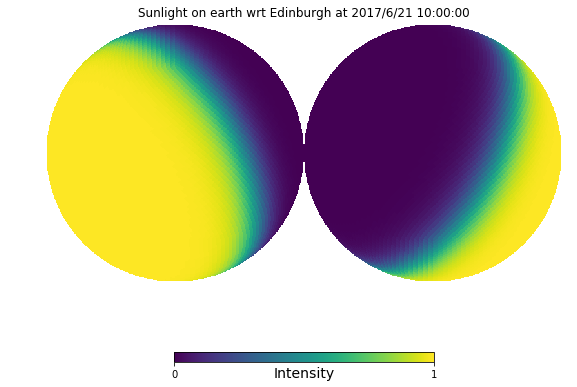

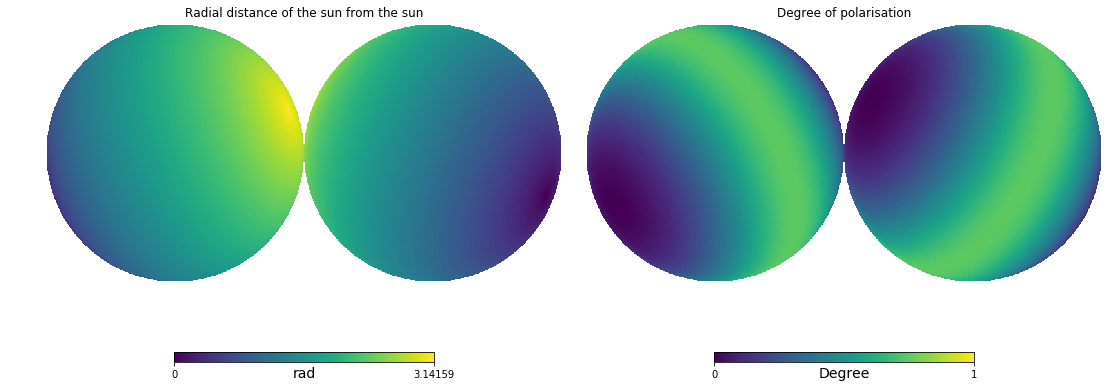

In [80]:
plt.figure(1, figsize=(15, 20))
hp.orthview(m, min=0, max=1, flip="geo", # coord="ge",
               title="Sunlight on earth wrt Edinburgh at %s" % str(edi.date),
               unit=r'Intensity', sub=(1,2,1), fig=1)

plt.figure(2, figsize=(15, 20))
hp.orthview(dist, min=0, max=np.pi, flip="geo", # coord="ge",
               title="Radial distance of the sun from the sun",
               unit=r'rad', sub=(1,2,1), fig=2)
hp.orthview(deg, min=0, max=1, flip="geo", # coord="ge",
               title="Degree of polarisation",
               unit=r'Degree', sub=(1,2,2), fig=2)

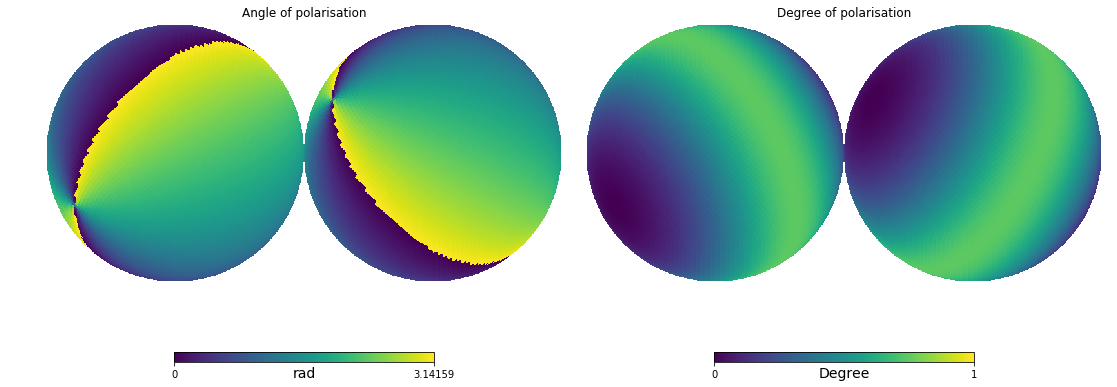

In [84]:
ang = rot_phi.copy() % np.pi

plt.figure(1, figsize=(15, 20))
hp.orthview(ang, min=0, max=np.pi, flip="geo", # coord="ge",
               title="Angle of polarisation",
               unit=r'rad', sub=(1,2,1), fig=1)
hp.orthview(deg, min=0, max=1, flip="geo", # coord="ge",
               title="Degree of polarisation",
               unit=r'Degree', sub=(1,2,2), fig=1)

In [380]:
# Polarising Filters

def polarisation(lat, lon, filt=None):
    # centre
    Epar00 = np.clip(np.cos(lat), 0, 1)
    Eper00 = np.clip(np.sin(lat), 0, 1)
    
    if filt is not None:
        Eper00 = .5 * (np.absolute(np.sin(2 * (lon + filt) + 1) + 1))
    
    # 90 degrees
#     Epar90 = np.clip(np.cos(lat), 0, 1)
#     Eper90 = np.clip(np.sin(lon), 0, 1)
    
    return np.array([Epar00, Eper00])

# Unpolarized: filters out ½ the intensity of any incident light.
I0 = .5 * np.sqrt(np.power(1. - rot_theta / np.pi, 2) + .5 * np.power(rot_theta / np.pi, 2))
print "I0", I0.min(), I0.max()

I0par, I0per = polarisation(rot_theta, rot_phi)
I0 = .5 * (np.cos(rot_theta) * I0par + np.sin(rot_theta) * I0per) 

# I0_hor, I0_ver = polarisation(rot_theta, rot_phi)
# I0 = .5 * np.sqrt(I0_hor ** 2 + I0_ver ** 2)
I1par_hor, I1per_hor = polarisation(rot_theta, rot_phi, filt=0)
I1_hor = (np.cos(rot_theta) * I1par_hor + np.sin(rot_theta) * I1per_hor) * I0

I1par_ver, I1per_ver = polarisation(rot_theta, rot_phi, filt=np.pi/2)
I1_ver = (np.cos(rot_theta) * I1par_ver + np.sin(rot_theta) * I1per_ver) * I0
# I1_ver = np.mean(polarisation(rot_theta, rot_phi, filt=np.pi/2), axis=0)

# Linear: transmits only vertical and horizontal components
# I1_hor = .5 * (np.absolute(np.sin(2 * rot_phi) + 1) + 1) * I0
# I1_ver = .5 * (np.absolute(np.sin(2 * (rot_phi + np.pi/2)) + 1) + 1) * I0
# I1 = np.sqrt(I1_hor ** 2 + I1_ver ** 2)
# I1 = .5 * (np.sin(4 * (rot_phi + np.pi/2)) + 1.) * I0
I1 = np.clip(I1_hor, 0, 1)
print "I1", I1.min(), I1.max()

# Linear: transmits only light polarized at +/- 45°

I2par_p45, I2per_p45 = polarisation(rot_theta, rot_phi, filt=np.pi/4)
I2_p45 = (np.cos(rot_theta) * I2par_p45 + np.sin(rot_theta) * I2per_p45) * I0

I2par_n45, I2per_n45 = polarisation(rot_theta, rot_phi, filt=-np.pi/4)
I2_n45 = (np.cos(rot_theta) * I2par_n45 + np.sin(rot_theta) * I2per_n45) * I0
# I2_p45 = .5 * (np.absolute(np.sin(2 * (rot_phi + np.pi/4)) + 1) + 1) * I0
# I2_n45 = .5 * (np.absolute(np.sin(2 * (rot_phi - np.pi/4)) + 1) + 1) * I0
# I2_p45 = .5 * (np.sin(2 * (rot_phi + np.pi/4)) + 1.) * I0
# I2_m45 = .5 * (np.sin(2 * (rot_phi - np.pi/4)) + 1.) * I0
# I2 = np.sqrt(I2_p45 ** 2 + I2_m45 ** 2)
# I2 = .5 * (np.sin(4 * (rot_phi + np.pi/4)) + 1.) * I0
I2 = np.clip(I2_p45, 0, 1)
print "I2", I2.min(), I2.max()

# Circular: transmits only R-polarized light (not implemented)
I3 = I0.copy()


# The Stokes Parameters

S = np.array([
    2 * I0,
    2 * I1 - 2 * I0,
    2 * I2 - 2 * I0,
    2 * I3 - 2 * I0
])
# S[1:] = S[1:] / np.linalg.norm(S[1:], axis=0)

print "S0", S[0].min(), S[0].max()
print "S1", S[1].min(), S[1].max()
print "S2", S[2].min(), S[2].max()
print "S3", S[3].min(), S[3].max()

I0 0.288675134685 0.497442606393
I1 7.14885817453e-08 1.0
I2 1.81325699017e-10 1.0
S0 0.000258842714793 1.0
S1 -0.999895635414 1.0
S2 -0.999950684445 1.0
S3 0.0 0.0


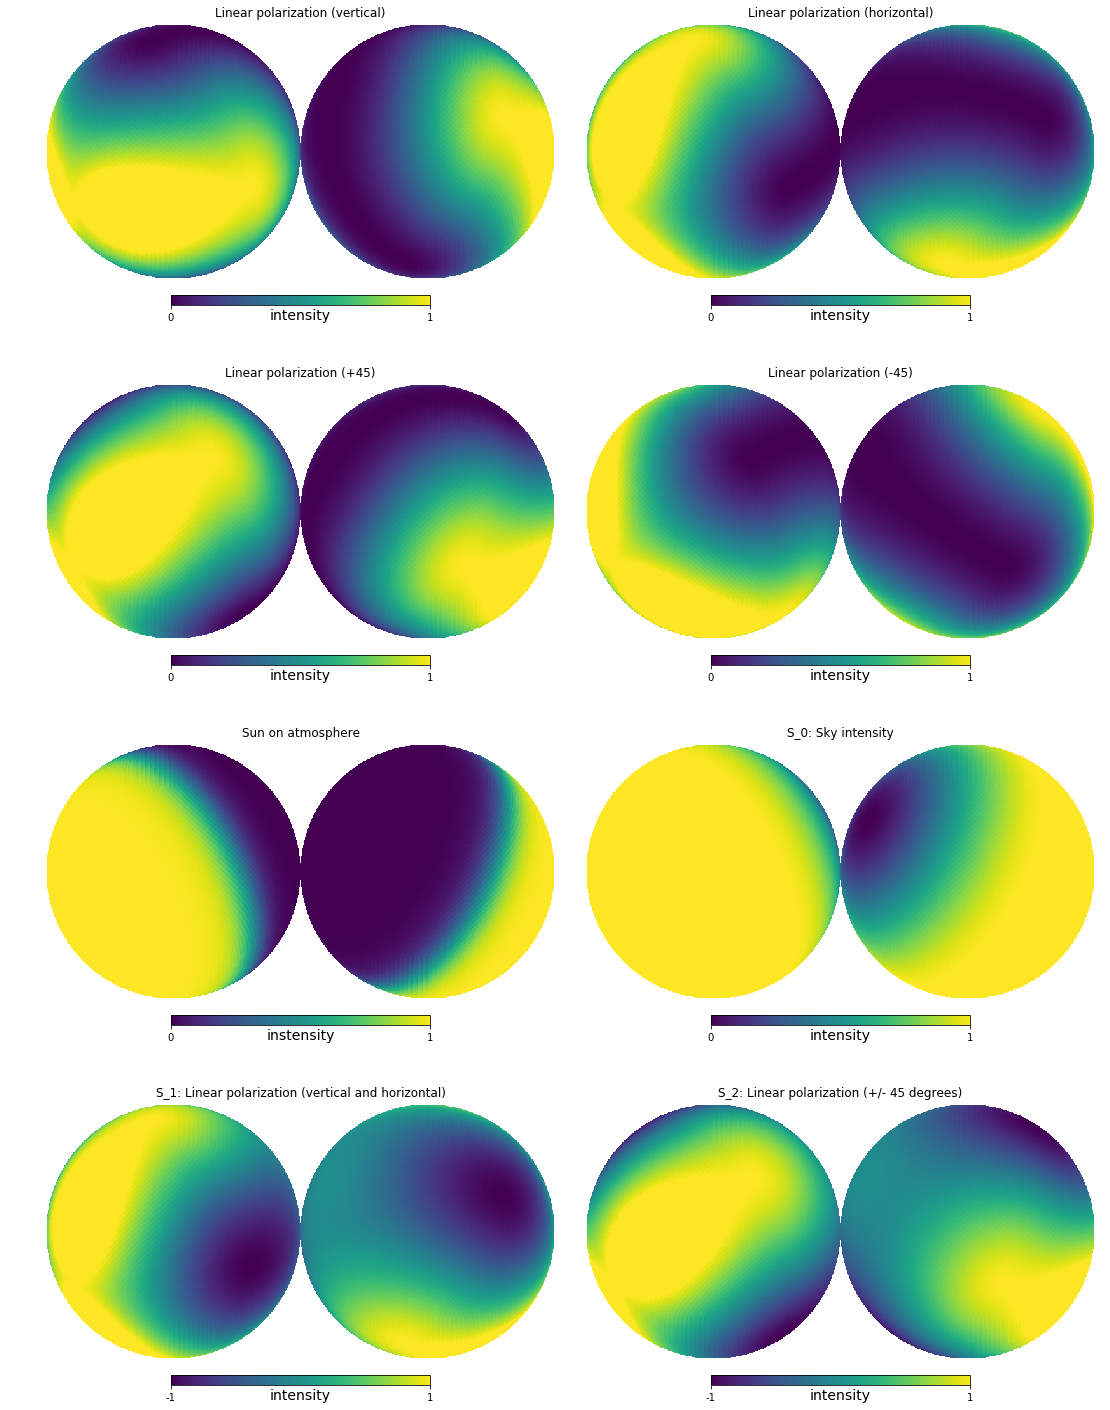

In [381]:
plt.figure(1, figsize=(15, 20))
hp.orthview(I1_ver, min=0, max=1, flip="geo", # coord="ge",
               title="Linear polarization (vertical)",
               unit=r'intensity', sub=(4,2,1), fig=1)
hp.orthview(I1_hor, min=0, max=1, flip="geo", # coord="ge",
               title="Linear polarization (horizontal)",
               unit=r'intensity', sub=(4,2,2), fig=1)
hp.orthview(I2_p45, min=0, max=1, flip="geo", # coord="ge",
               title="Linear polarization (+45)",
               unit=r'intensity', sub=(4,2,3), fig=1)
hp.orthview(I2_n45, min=0, max=1, flip="geo", # coord="ge",
               title="Linear polarization (-45)",
               unit=r'intensity', sub=(4,2,4), fig=1)
hp.orthview(m, min=0, max=1, flip="geo", # coord="ge",
               title="Sun on atmosphere",
               unit=r'instensity', sub=(4,2,5), fig=1)
hp.orthview(S[0], min=0, max=1, flip="geo", # coord="ge",
               title="S_0: Sky intensity",
               unit=r'intensity', sub=(4,2,6), fig=1)
hp.orthview(S[1], min=-1, max=1, flip="geo", # coord="ge",
               title="S_1: Linear polarization (vertical and horizontal)",
               unit=r'intensity', sub=(4,2,7), fig=1)
hp.orthview(S[2], min=-1, max=1, flip="geo", # coord="ge",
               title="S_2: Linear polarization (+/- 45 degrees)",
               unit=r'intensity', sub=(4,2,8), fig=1)

In [382]:
I, Q, U, V = S

# Degree of polarisation
P = np.sqrt(Q ** 2 + U ** 2 + V ** 2) / I
print P.min(), P.max()

# Degree of linear polarization
LP = np.sqrt(Q ** 2 + U ** 2) / I
print LP.min(), LP.max()

0.0262148460731 1.41421356237
0.0262148460731 1.41421356237


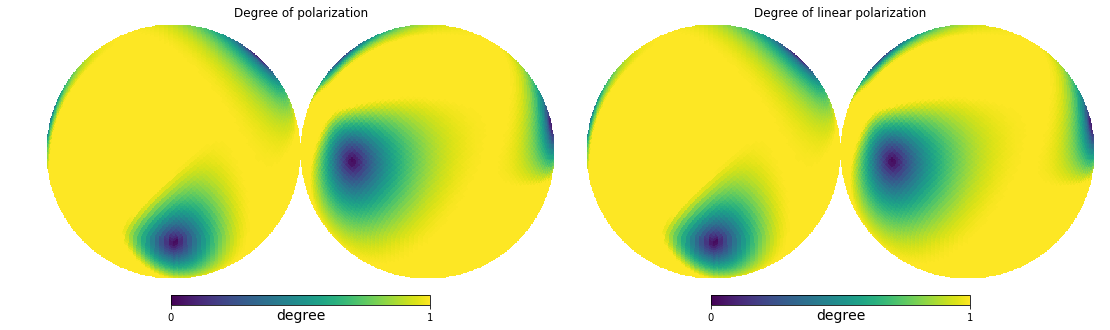

In [383]:
plt.figure(1, figsize=(15, 20))
hp.orthview(P, min=0, max=1, flip="geo", # coord="ge",
               title="Degree of polarization",
               unit=r'degree', sub=(4,2,1), fig=1)
hp.orthview(LP, min=0, max=1, flip="geo", # coord="ge",
               title="Degree of linear polarization",
               unit=r'degree', sub=(4,2,2), fig=1)